In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator
import seaborn as sns

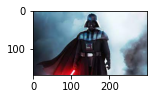

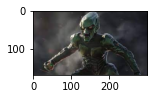

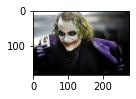

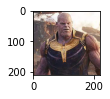

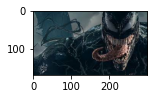

In [2]:
class_names = ['Vader','Green Goblin','Joker','Thanos','Venom']


for i in range(5):
    paths = os.path.join('Villains', class_names[i], class_names[i]+' 1.jpg')
    if class_names[i]=='Vader':
        vader = 'Darth Vader'
        paths = os.path.join('Villains', vader, class_names[i]+' 1.jpg')
    image = plt.imread(paths)
    plt.subplot(3, 1, 1)
    plt.imshow(image)
    plt.show()


In [3]:
IMG_PATH = 'Villains'
img_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=0.45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.1,
        fill_mode='nearest'
)

In [4]:
train_generator = img_datagen.flow_from_directory(
        IMG_PATH,
        target_size=(150,150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        subset='training'
)

validation_generator = img_datagen.flow_from_directory(
        IMG_PATH,
        target_size=(150,150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        subset='validation'
)

Found 90 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [5]:
img_generator = img_datagen.flow_from_directory(
        IMG_PATH,
        target_size=(150,150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        save_to_dir='augmented',
        save_prefix='aug',
        save_format='jpg'
)


Found 100 images belonging to 5 classes.


In [6]:
file_names= img_generator.filenames
labels= img_generator.labels
label_dict=img_generator.class_indices

In [7]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


(32, 150, 150, 3)


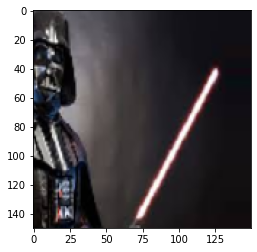

(32, 150, 150, 3)


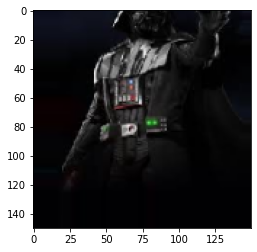

(32, 150, 150, 3)


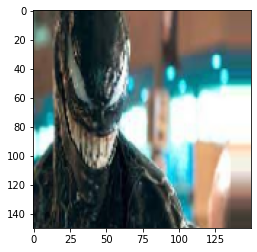

(4, 150, 150, 3)


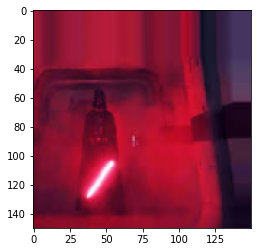

(32, 150, 150, 3)


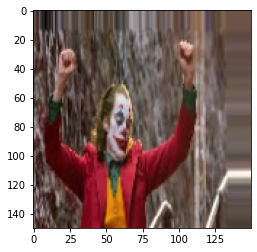

In [8]:
for _ in range(5):
    img, label = img_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Modelling

In [9]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu',

                           input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
hasil = model.fit(train_generator,validation_data=validation_generator, epochs=10)

Epoch 1/10
3/3 [==============================] - 23s 5s/step - loss: 1.6746 - accuracy: 0.1667 - val_loss: 1.6611 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 15s 6s/step - loss: 1.6220 - accuracy: 0.2111 - val_loss: 1.6030 - val_accuracy: 0.4000
Epoch 3/10
3/3 [==============================] - 15s 5s/step - loss: 1.6056 - accuracy: 0.2556 - val_loss: 1.5987 - val_accuracy: 0.1000
Epoch 4/10
3/3 [==============================] - 16s 5s/step - loss: 1.5977 - accuracy: 0.2000 - val_loss: 1.5896 - val_accuracy: 0.2000
Epoch 5/10
3/3 [==============================] - 15s 5s/step - loss: 1.5728 - accuracy: 0.3000 - val_loss: 1.4967 - val_accuracy: 0.3000
Epoch 6/10
3/3 [==============================] - 17s 5s/step - loss: 1.4978 - accuracy: 0.3333 - val_loss: 1.3541 - val_accuracy: 0.2000
Epoch 7/10
3/3 [==============================] - 15s 5s/step - loss: 1.5957 - accuracy: 0.3556 - val_loss: 1.4754 - val_accuracy: 0.3000
Epoch 8/10
3/3 [==================

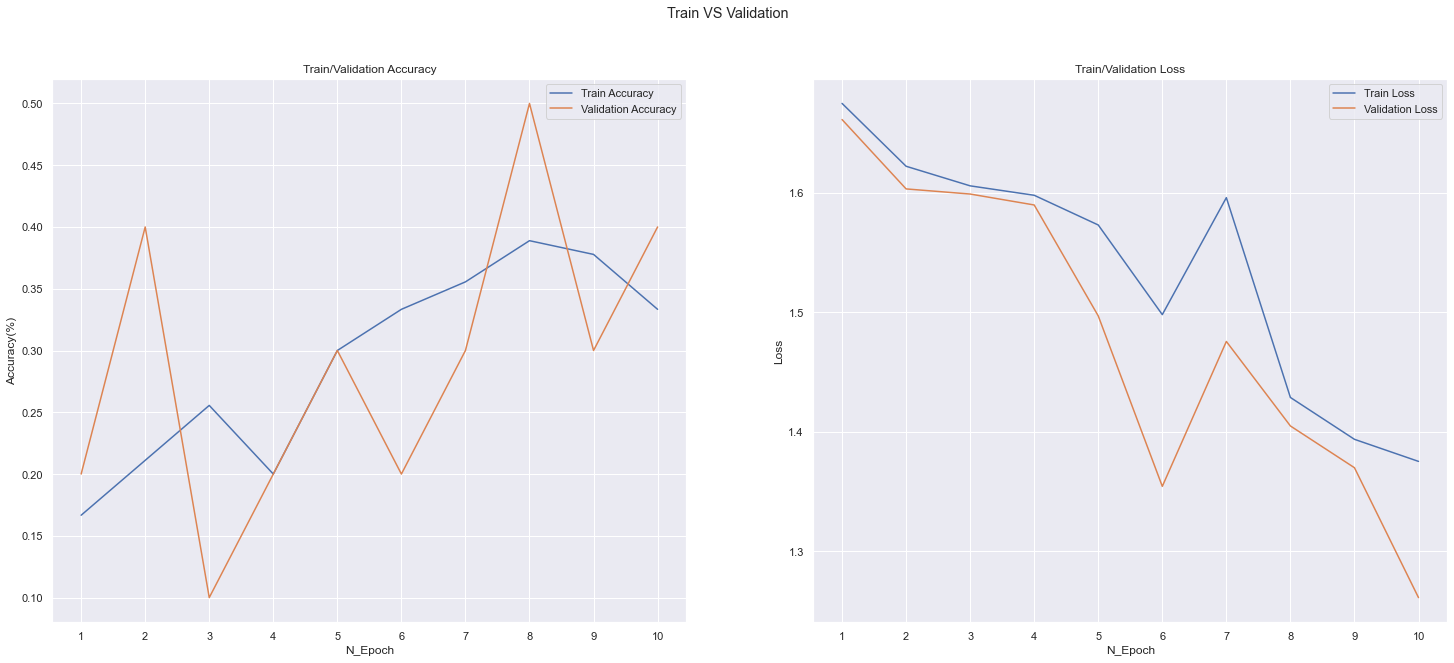

In [15]:
epoch = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()
